```
pip install wordcloud
pip install jieba
```

In [ ]:
import requests
import json
from bs4 import BeautifulSoup
from IPython.display import Image
from IPython.core.display import HTML 
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#df_danmu_1=pd.read_csv("E:/dal/可视化/code/SentimentalAnalysis/番外篇第1集_current.csv")
#df_danmu_2=pd.read_csv("./SentimentalAnalysis/s1.csv")
#df_danmu_3=pd.read_csv("./SentimentalAnalysis/s2.csv")
#df_danmu_4=pd.read_csv("./SentimentalAnalysis/s3.csv")
df_danmu_5=pd.read_csv("./SentimentalAnalysis/s4.csv")


In [ ]:
df_danmu = pd.concat([df_danmu_5])
df_danmu.shape

In [7]:
import jieba

In [8]:
fenci = jieba.cut("我在北京上大学，我上的是比清华好的北京大学",cut_all=True)
print("/ ".join(fenci))

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.658 seconds.
Prefix dict has been built succesfully.


我/ 在/ 北京/ 上/ 大学/ / / 我/ 上/ 的/ 是/ 比/ 清华/ 好/ 的/ 北京/ 北京大学/ 大学


In [9]:
fenci = jieba.cut("我在北京读大学，我读的是比清华好的北京大学",cut_all=False)
print("/ ".join(fenci))

我/ 在/ 北京/ 读/ 大学/ ，/ 我读/ 的/ 是/ 比/ 清华/ 好/ 的/ 北京大学


In [10]:
fenci = jieba.cut("我爱北京天安门，五环比六环少一环，学好python就不是低端劳动力了，呜呜",cut_all=False)
print("/ ".join(fenci))

我/ 爱/ 北京/ 天安门/ ，/ 五环/ 比六环少/ 一环/ ，/ 学好/ python/ 就/ 不是/ 低端/ 劳动力/ 了/ ，/ 呜呜


In [12]:
jieba.suggest_freq("劳动力", tune=True)

3499

In [14]:
counter= jieba.suggest_freq("六环", tune=True)
fenci = jieba.cut("我爱北京天安门，五环比六环多一环，学好python就不是低端劳动力了，呜呜",cut_all=False)
print("/ ".join(fenci))

我/ 爱/ 北京/ 天安门/ ，/ 五环/ 比/ 六环/ 多一环/ ，/ 学好/ python/ 就/ 不是/ 低端/ 劳动力/ 了/ ，/ 呜呜


In [15]:
print(counter)

2


### 弹幕分词处理

In [16]:
df_danmu = df_danmu.dropna()

In [20]:
df_danmu['danmu']

0                                    麻蛇羹
1                                    前二万
2                              我的麻蛇羹呢！！！
3                                   楞次定律
4                                   祖国万岁
5                            胜利属于我们 祖国万岁
6                            每一集都看着我热泪盈眶
7                                    B29
8                                     万岁
9                               为了祖国，冲啊！
10                               ppsh41吧
11                                  万岁冲锋
12                          胜利属于我们，祖国万岁！
14                                  ypa!
15                           胜利属于我们，祖国万岁
16                                 不是飞姬啊
17                                   b29
18                 这不是强行煽情！再说一次！这是真实的历史！
19                                胜利属于我们
20                               第999个弹幕
21                           胜利属于我们 祖国万岁
22                                 空中绞杀战
23                           胜利属于我们祖国万岁！
24              说强行煽情的先去补补你的历史课，再来看那兔好么！
25              

In [21]:
comments = " ".join(df_danmu['danmu'])

In [25]:
comments[0:1000]

'麻蛇羹 前二万 我的麻蛇羹呢！！！ 楞次定律 祖国万岁 胜利属于我们 祖国万岁 每一集都看着我热泪盈眶 B29 万岁 为了祖国，冲啊！ ppsh41吧 万岁冲锋 胜利属于我们，祖国万岁！ ypa! 胜利属于我们，祖国万岁 不是飞姬啊 b29 这不是强行煽情！再说一次！这是真实的历史！ 胜利属于我们 第999个弹幕 胜利属于我们 祖国万岁 空中绞杀战 胜利属于我们祖国万岁！ 说强行煽情的先去补补你的历史课，再来看那兔好么！ 胜利属于我们，祖国万岁！！！ 前有琅琊五壮士，后有抗美八勇士，请你们尊重他们 我忽然想吃麻蛇羹了 胜利属于我们，祖国万岁 背后既是祖国 我们无路可退 胜利属于我们，祖国万岁 …一会没在居然更新了？ 前2W！！ 只有拼出来的荣誉，没有等出来的辉煌。 胜利属于我们，祖国万岁！ 胜利属于我们，祖国万岁 胜利属于我们，祖国万岁！ 背后即是祖国，我们无路可退 胜利属于我们，祖国万岁！ 没人？ 胜利属于我们！祖国万岁！ 决心是褒义词，这里用中性词决定更合适→ 前两万 前方泪目高能 我第一 胜利属于我们，祖国万岁！！ 黑的漂亮 好多人。 23333333 b29 23333333333333 23333333333333333333333 铁在烧 噢朕的江山 祖国万岁 233333333333333 胜利属于我们，祖国万岁！ 黑的漂亮 祖国万岁 人家英雄战士拿命给你换煽情？你可别搞笑了 胜利属于我们，祖国万岁！ quanyunh 麻蛇高产啊…… 来了来了！竟然更新了！ 雌性 23333 这不是里约奥运会的状况吗？！ 2333333333333 好一个高级黑！我喜欢！ 高级黑！ 里约奥运会中国遭黑哨 第一季每一集都会哭是因为那时中国最艰难的时候 胜利属于我们，祖国万岁！ 飞姬是民航啊。。。 就冲这个硬币给你了 黑的漂亮 63军！ 23333333 胜利属于我们！祖国万岁！ 感谢红字科普！ 胜利属于我们！祖国万岁！ 胜利属于我们 祖国万岁 争四狂魔阿森纳 我大天朝的弹幕怎么能断？！兔子们中国红都给我刷起来啊！ 来了 心疼牛牛233 高端黑啊2333 噗~48、49、40…… 啊，蜡笔小新的声音！ 那有没有雄性战术 胜利属于我们，祖国万岁！ 胜利属于我们，祖国万岁！ 胜利属于我们 前3W 很实用的战术 正好制约了志愿军的优点 致敬！！最可爱的人！！！！ 花式黑，嘿嘿

In [28]:
fenci_all = jieba.cut(comments,cut_all=False)
space = " ".join(fenci_all)

In [29]:
space[1:100]

'蛇 羹   前 二万   我 的 麻蛇 羹 呢 ！ ！ ！   楞次定律   祖国 万岁   胜利 属于 我们   祖国 万岁   每一集 都 看着 我 热泪盈眶   B29   万岁   为了 祖'

In [30]:
from wordcloud import WordCloud,ImageColorGenerator
import numpy as np
from PIL import Image

In [55]:
guoqi_coloring = np.array(Image.open("timg.jpeg"))
image_colors = ImageColorGenerator(guoqi_coloring)

In [65]:
# 参数都可以注释掉，但必须设置font_path
wc = WordCloud(
    width=800,
    height=600,
    background_color="white",  # 设置背景颜色
    max_words=500,  # 词的最大数（默认为200）
    max_font_size=60,  # 最大字体尺寸
    min_font_size=10,  # 最小字体尺寸（默认为4）
    colormap='viridis',  # string or matplotlib colormap, default="viridis"
    random_state=10,  # 设置有多少种随机生成状态，即有多少种配色方案
    mask=guoqi_coloring,  # 读取遮罩图片！！
    font_path='FZnahan.ttf'
)


In [66]:
my_wordcloud = wc.generate(space)

In [58]:
print(type(my_wordcloud))

<class 'wordcloud.wordcloud.WordCloud'>


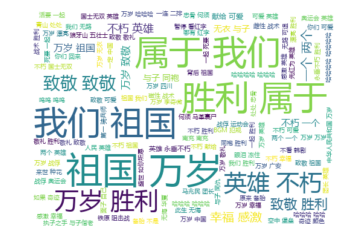

In [59]:
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.figure()

In [ ]:
[]()

In [ ]:
##comments



plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.figure()

# recolor wordcloud and show
# we could also give color_func=image_colors directly in the constructor


plt.imshow(guoqi_coloring, cmap=plt.cm.gray, interpolation="bilinear")
plt.axis("off")
plt.show()

wc.to_file("result.jpg")

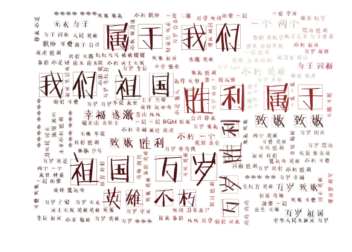

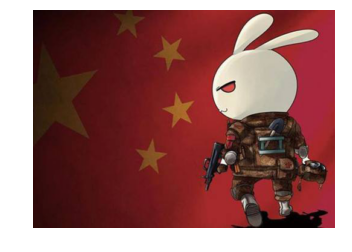

In [67]:
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.figure()

plt.imshow(guoqi_coloring, cmap=plt.cm.gray, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# https://stackoverflow.com/users/2901002/jezrael
from stackoverflow_tag_cloud.stackoverflow_users_taginfo import tag_cloud
python_wc=tag_cloud(link = 2901002,lim_num_tags=1000, image_dims=(1024, 768),
          out_filepath="pandas.png")

In [ ]:
from scipy.misc import imread

plt.imshow(imread('pandas.png', 1), interpolation="bilinear")
plt.axis("off")
plt.figure()